# Preliminary Data Analysis of a Typical Data Table

A preliminary analysis of the "atp_matches_2010.csv" table. This table contains data pertaining to all the matches played in the ATP World Tour in 2010. I started with one table to simplify the intial analysis. The other tables in the database have the same structure.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t2010 = pd.read_csv('atp_matches_2010.csv')

t2010.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2010-339,Brisbane,Hard,32,A,20100103,1,104053,1.0,NaN,...,34.0,29.0,11.0,10.0,3.0,5.0,7.0,4410.0,77.0,598.0
1,2010-339,Brisbane,Hard,32,A,20100103,2,104958,NaN,WC,...,34.0,22.0,14.0,9.0,7.0,10.0,134.0,400.0,78.0,590.0
2,2010-339,Brisbane,Hard,32,A,20100103,3,104755,NaN,NaN,...,58.0,38.0,14.0,14.0,7.0,11.0,52.0,850.0,88.0,568.0
3,2010-339,Brisbane,Hard,32,A,20100103,4,105051,NaN,Q,...,29.0,16.0,15.0,9.0,2.0,5.0,285.0,151.0,28.0,1260.0
4,2010-339,Brisbane,Hard,32,A,20100103,5,104607,4.0,NaN,...,41.0,26.0,14.0,9.0,6.0,9.0,20.0,1655.0,251.0,179.0
5,2010-339,Brisbane,Hard,32,A,20100103,6,104571,NaN,NaN,...,36.0,28.0,20.0,12.0,3.0,6.0,42.0,945.0,55.0,790.0
6,2010-339,Brisbane,Hard,32,A,20100103,7,103248,NaN,NaN,...,36.0,17.0,3.0,7.0,5.0,10.0,119.0,461.0,67.0,649.0
7,2010-339,Brisbane,Hard,32,A,20100103,8,105064,8.0,NaN,...,38.0,20.0,17.0,12.0,2.0,8.0,36.0,1021.0,73.0,611.0
8,2010-339,Brisbane,Hard,32,A,20100103,9,103484,NaN,NaN,...,52.0,41.0,16.0,14.0,3.0,5.0,44.0,935.0,25.0,1320.0
9,2010-339,Brisbane,Hard,32,A,20100103,10,102967,NaN,NaN,...,21.0,15.0,10.0,8.0,1.0,5.0,58.0,744.0,80.0,587.0


### Structure and Information

First, let's identify the information contained within such a table.  
  
Each row represents one match. There are **3030 rows**.  
  
There are **49 columns** (description can be found in *matches_data_dictionary.txt*). These columns can be categorized into :
- information relative to the tournament :
    - tourney_id : id of the tournament (no predictable structure)
    - tourney_name : name of the tournament
    - surface : Hard, Clay or Grass
    - draw_size : number of players in the tournament
    - tourney_level : G (Grand Slam), M (Masters 100s), A (Other tour-level events), ...
    - tourney_date : YYYYMMDD
<br/><br/>
- information relative to the match
    - match num
    - score : e.g. 6-3 3-6 7-6(4)
    - best_of : 3 or 5
    - round : R32, R16, QF, SF, F
    - **minutes : length of the match in minutes, the data we are tyring to predict**
<br/><br/>
- information relative to the winner
    - winner_id : can be used to find the winner in *atp_players.csv*
    - winner_seed : seed of the winner coming into the tournament, missing for most players
    - winner_entry
    - winner_name
    - winner_hand : R or L
    - winner_ht : height in cm
    - winner_ioc : 3 digit country code
    - winner_age
    <br/><br/>
    - winner_rank : (most recent before match) ATP ranking
    - winner_rank_points : ATP points
<br/><br/>
- information relative to the loser
    - loser_id
    - loser_seed
    - loser_entry
    - loser_name
    - loser_hand
    - loser_ht
    - loser_ioc
    - loser_age
    <br/><br/>
    - loser_rank
    - loser_rank_points
<br/><br/>
- match statistics
    - w_ace : winner's number of aces
    - w_df : winner's number of doubles faults
    - w_svpt : winner's number of serve points
    - w_1stIn : winner's number of first serves made
    - w_1stWon : winner's number of first-serve points won
    - w_2ndWon : winner's number of second-serve points won
    - w_SvGms : winner's number of serve games
    - w_bpSaved : winner's number of break points saved
    - w_bpFaced : winner's number of break points faced
    <br/><br/>
    - l_ace
    - l_df
    - l_svpt
    - l_1stIn
    - l_1stWon
    - l_2ndWon
    - l_SvGms
    - l_bpSaved
    - l_bpFaced


### Selection of potentially interesting columns

For the purpose of match length prediction, some of these columns are interesting to consider and some aren't.

For this preliminary analysis, we'll only consider information that's available before the match. Thus, we won't look at the score or any of the matchs statistics.  
  
Let's first analyze some columns which could have a close connection with match length :
- best-of
- surface
- player ranks

In [14]:
t2010_1 = t2010.loc[:, ["minutes", "surface", "best_of", "winner_rank", "loser_rank"]]
display(t2010_1.head(10))

display(t2010_1.describe()) # Quick summary of the data
display(t2010_1.isnull().sum()) # Counting missing values

,minutes,surface,best_of,winner_rank,loser_rank
0,84.0,Hard,3,7.0,77.0
1,70.0,Hard,3,134.0,78.0
2,121.0,Hard,3,52.0,88.0
3,64.0,Hard,3,285.0,28.0
4,69.0,Hard,3,20.0,251.0
5,101.0,Hard,3,42.0,55.0
6,41.0,Hard,3,119.0,67.0
7,105.0,Hard,3,36.0,73.0
8,88.0,Hard,3,44.0,25.0
9,50.0,Hard,3,58.0,80.0


,minutes,best_of,winner_rank,loser_rank
count,2686.000000,3030.000000,3009.000000,2981.000000
mean,107.034252,3.487129,80.062479,124.794029
std,42.148009,0.858607,141.695201,191.898347
min,5.000000,3.000000,1.000000,1.000000
25%,77.000000,3.000000,18.000000,38.000000
50%,100.000000,3.000000,43.000000,69.000000
75%,129.000000,3.000000,82.000000,116.000000
max,665.000000,5.000000,1763.000000,1739.000000


minutes        344
surface          0
best_of          0
winner_rank     21
loser_rank      49
dtype: int64

### Best of and Surface

In [15]:
best_of = pd.pivot_table(t2010_1, values='minutes', columns=['best_of']) # average duration per best of
display(best_of)

surface = pd.pivot_table(t2010_1, values='minutes', columns=['surface']) # average duration per surface
display(surface)

surface_best_of = pd.pivot_table(t2010_1, values='best_of', columns=['surface'])
display(surface_best_of)

best_of,3,5
minutes,96.978899,150.355731


surface,Clay,Grass,Hard
minutes,107.190758,115.566667,105.288586


surface,Carpet,Clay,Grass,Hard
best_of,4.25,3.424615,3.843137,3.452395


Logically, Bo5s last longer than Bo3s. A more thorough analysis could try to work out the number of sets played from the score column.  

At first sight, the surface table seems to indicate that the Hard court is faster than the Clay court which is faster than the Grass court. However, there are 5 Bo3 events (i.e. non Grand Slam) played on Grass, which is considerably less than on Hard (35) or Clay (21). Wimbledon's longer matches end up having a bigger influence.

In [16]:
t2010_1_bo3 = table_1[t2010_1["best_of"] == 3]
display(t2010_1_bo3.head(10))

surface_bo3 = pd.pivot_table(t2010_1_bo3, values='minutes', columns=['surface']) # average duration per surface for bo3s
display(surface_bo3)

,minutes,surface,best_of,winner_rank,loser_rank
0,84.0,Hard,3,7.0,77.0
1,70.0,Hard,3,134.0,78.0
2,121.0,Hard,3,52.0,88.0
3,64.0,Hard,3,285.0,28.0
4,69.0,Hard,3,20.0,251.0
5,101.0,Hard,3,42.0,55.0
6,41.0,Hard,3,119.0,67.0
7,105.0,Hard,3,36.0,73.0
8,88.0,Hard,3,44.0,25.0
9,50.0,Hard,3,58.0,80.0


surface,Clay,Grass,Hard
minutes,99.878661,88.741379,96.47789


Here it becomes apparent that Grass court makes for faster matches than Hard which is in turn faster than Clay.

### Player rankings

,minutes,surface,best_of,winner_rank,loser_rank,rank_diff
0,84.0,Hard,3,7.0,77.0,70.0
1,70.0,Hard,3,134.0,78.0,56.0
2,121.0,Hard,3,52.0,88.0,36.0
3,64.0,Hard,3,285.0,28.0,257.0
4,69.0,Hard,3,20.0,251.0,231.0
5,101.0,Hard,3,42.0,55.0,13.0
6,41.0,Hard,3,119.0,67.0,52.0
7,105.0,Hard,3,36.0,73.0,37.0
8,88.0,Hard,3,44.0,25.0,19.0
9,50.0,Hard,3,58.0,80.0,22.0


,minutes
rank_diff,
1.0,97.605263
2.0,97.239130
3.0,104.690476
4.0,109.744186
5.0,116.833333
6.0,114.969697
7.0,112.739130
8.0,103.333333
9.0,97.032258


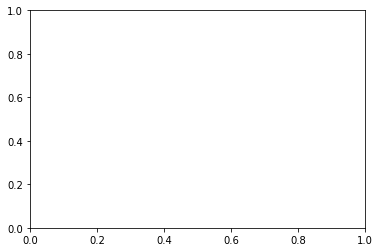

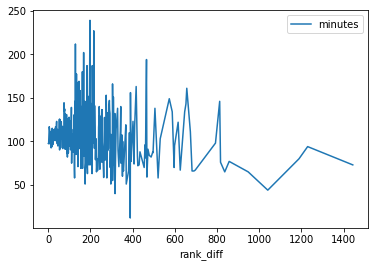

In [17]:
t2010_1["rank_diff"] = np.abs(t2010_1["winner_rank"] - t2010_1["loser_rank"])
display(t2010_1.head(10))

ranking = pd.pivot_table(t2010_1, values="minutes", columns="rank_diff").T
display(ranking.head(10))

fig, ax = plt.subplots()
ranking.plot()
plt.show()

The expected trend is that the bigger the difference between the two players' rankings, the faster the match. This isn't immediately apparent.

# Another data set

Let's see if our findings are consistent with another data set - the 2015 ATP World Tour matches.

In [27]:
t2015 = pd.read_csv('atp_matches_2015.csv')
t2015_1 = t2015.loc[:, ["minutes", "surface", "best_of", "winner_rank", "loser_rank"]]
display(t2015_1.head(10))

best_of_2015 = pd.pivot_table(t2015_1, values='minutes', columns=['best_of']) # average duration per best of
display(best_of_2015)

t2015_1_bo3 = t2015_1[t2015_1["best_of"] == 3]
surface_bo3_2015 = pd.pivot_table(t2015_1_bo3, values='minutes', columns=['surface']) # average duration per surface for bo3s
display(surface_bo3_2015)

,minutes,surface,best_of,winner_rank,loser_rank
0,65.0,Hard,3,153.0,220.0
1,104.0,Hard,3,73.0,123.0
2,68.0,Hard,3,125.0,21.0
3,69.0,Hard,3,31.0,72.0
4,144.0,Hard,3,34.0,110.0
5,78.0,Hard,3,23.0,71.0
6,110.0,Hard,3,177.0,16.0
7,59.0,Hard,3,85.0,84.0
8,113.0,Hard,3,69.0,201.0
9,75.0,Hard,3,149.0,25.0


best_of,3,5
minutes,95.58935,146.751969


surface,Clay,Grass,Hard
minutes,97.105556,97.0,94.137809


We see similar times for bo3s and bo5s.
However, it seems the Grass court matches were longer this year.